In [24]:
class GeneticSelector():
    def __init__(self, estimator, generation, size, best, random, 
                 children, mutation_r):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.generation = generation
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.best = best
        # Number of random chromosomes to select
        self.random = random
        # Number of children created during crossover
        self.children = children
        # Probablity of chromosome mutation
        self.mutation_r = mutation_r
        
        if int((self.best + self.random) / 2) * self.children != self.size:
            raise ValueError("The population size is not stable.")  
            
    def initilize(self):
        population = []
        for i in range(self.size):
            chromosome = np.ones(self.n_features, dtype=np.bool)
            mask = np.random.rand(len(chromosome)) < 0.3
            chromosome[mask] = False
            population.append(chromosome)
        return population

    def fitness(self, population):
        X, y = self.dataset
        scores = []
        for chromosome in population:
            score = -1.0 * np.mean(cross_val_score(self.estimator, X[:,chromosome], y, 
                                                       cv=5, 
                                                       scoring="neg_mean_squared_error"))
            scores.append(score)
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds]), list(population[inds,:])

    def select(self, population_sorted):
        population_next = []
        for i in range(self.best):
            population_next.append(population_sorted[i])
        for i in range(self.random):
            population_next.append(random.choice(population_sorted))
        random.shuffle(population_next)
        return population_next

    def crossover(self, population):
        population_next = []
        for i in range(int(len(population)/2)):
            for j in range(self.children):
                chromosome1, chromosome2 = population[i], population[len(population)-1-i]
                child = chromosome1
                mask = np.random.rand(len(child)) > 0.5
                child[mask] = chromosome2[mask]
                population_next.append(child)
        return population_next
	
    def mutate(self, population):
        population_next = []
        for i in range(len(population)):
            chromosome = population[i]
            if random.random() < self.mutation_r:
                mask = np.random.rand(len(chromosome)) < 0.05
                chromosome[mask] = False
            population_next.append(chromosome)
        return population_next

    def generate(self, population):
        # Selection, crossover and mutation
        scores_sorted, population_sorted = self.fitness(population)
        population = self.select(population_sorted)
        population = self.crossover(population)
        population = self.mutate(population)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
        
        return population

    def fit(self, X, y):
 
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initilize()
        for i in range(self.generation):
            population = self.generate(population)
            
        return self 
    
    @property
    def support_(self):
        return self.chromosomes_best[-1]

    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend()
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [28]:
#import necessary liraries to work with
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
#show features
data=pd.read_csv('Admission_Predict.csv')
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [30]:
#seed fixing
SEED = 2018
random.seed(SEED)
np.random.seed(SEED)

In [31]:
#data sampling


train, test = train_test_split(data, test_size=0.2)

X=data[['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].values
y=data['Chance of Admit '].values

estimator_f = LinearRegression()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = regressor.predict(X_test)
y_pred

array([0.69274573, 0.7162844 , 0.79941252, 0.61382844, 0.72412844,
       0.57724345, 0.69870221, 0.65305302, 0.85967181, 0.92208853,
       0.50741235, 0.87777388, 0.69576844, 0.48003146, 0.82596866,
       0.59565583, 0.63612398, 0.79850128, 0.58499028, 0.7307459 ,
       0.8786028 , 0.8559767 , 0.64900472, 0.47743531, 0.78607991,
       0.60253488, 0.48121579, 0.61628425, 0.91027272, 0.63613885,
       0.63020528, 0.7557007 , 0.76839541, 0.5561474 , 0.76461587,
       0.75237249, 0.63895412, 0.85786512, 0.62587771, 0.96140491,
       0.71247318, 0.68578127, 0.68249048, 0.77665142, 0.84269291,
       0.63840207, 0.59141106, 0.70924876, 0.5980027 , 0.60045941,
       0.67382167, 0.78571075, 0.65927066, 0.8826041 , 0.73344715,
       0.77032863, 0.70188829, 0.70511474, 0.73998397, 0.81268997,
       0.74512167, 0.47570513, 0.60011772, 0.5445201 , 0.84399797,
       0.84187797, 0.72356766, 0.84411964, 0.75646874, 0.76426218,
       0.56701231, 0.84379017, 0.80029522, 0.58786428, 0.91528

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [36]:
df.head(25)

,Actual,Predicted
0,0.71,0.692746
1,0.70,0.716284
2,0.79,0.799413
3,0.73,0.613828
4,0.72,0.724128
5,0.48,0.577243
6,0.77,0.698702
7,0.71,0.653053
8,0.90,0.859672
9,0.94,0.922089


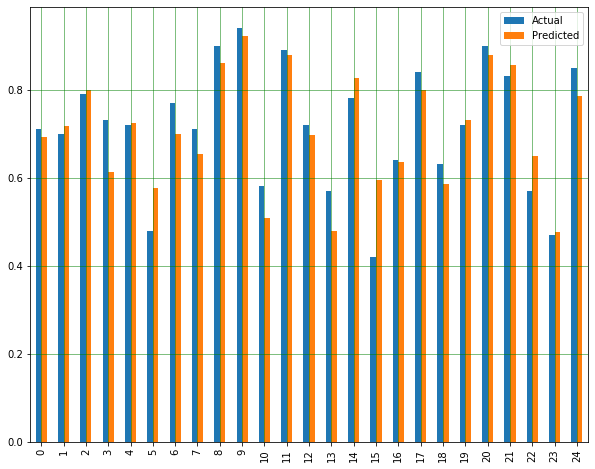

In [12]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)*1000)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.048191587000483864
Mean Squared Error: 4.369598885687031
Root Mean Squared Error: 0.06610294158119615


In [32]:
#genetic implementation

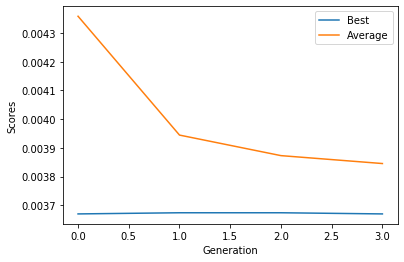

Mean Squared Error before doing feature selection: 4.369598885687031
Mean Square Error after feature selection: 0.00


In [42]:

selector = GeneticSelector(estimator=LinearRegression(), 
                      generation=4, size=200, best=40, random=40, 
                      children=5, mutation_r=0.05)
selector.fit(X_train, y_train)
selector.plot_scores()
score = -1.0 * cross_val_score(est, X_test[:,selector.support_], y_pred, cv=5, scoring="neg_mean_squared_error")
print('Mean Squared Error before doing feature selection:', metrics.mean_squared_error(y_test, y_pred)*1000)
print("Mean Square Error after feature selection: {:.2f}".format(np.mean(score)*10000))